### This notebook presents deaths over time for certain age groups with certain vaccination status

In [161]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')
#df = df.loc[(df['Vaccine product'] == 'all_types') & (df['MMWR week'] == 202213)]
df = df.loc[(df['outcome'] == 'death') & (df['Vaccine product'] == 'all_types') ]
df
# & (df['Age group'] != 'all_ages_adj')
#(df['outcome'] == 'death') & 

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
760,death,APR 2021,202114,12-17,all_types,0,3.566200e+04,2,16450239.00,0.000000,0.012158,NaN,NaN,NaN,NaN,0
761,death,APR 2021,202114,18-29,all_types,0,2.375990e+06,24,29083633.00,0.000000,0.082521,NaN,NaN,NaN,NaN,0
762,death,APR 2021,202114,30-49,all_types,2,6.890181e+06,214,38710374.00,0.029027,0.552823,19.045266,NaN,NaN,NaN,0
763,death,APR 2021,202114,50-64,all_types,9,6.882873e+06,668,21515030.00,0.130759,3.104806,23.744430,NaN,NaN,NaN,0
764,death,APR 2021,202114,65-79,all_types,55,1.351306e+07,774,7219634.00,0.407014,10.720765,26.340054,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,death,JUL 2022,202230,30-49,all_types,16,4.133758e+07,24,12723777.30,0.038706,0.188623,4.873268,NaN,NaN,NaN,1
1477,death,JUL 2022,202230,50-64,all_types,71,3.392556e+07,76,6314462.60,0.209282,1.203586,5.751033,NaN,NaN,NaN,1
1478,death,JUL 2022,202230,65-79,all_types,254,2.514135e+07,188,1978245.90,1.010288,9.503369,9.406597,NaN,NaN,NaN,1
1479,death,JUL 2022,202230,80+,all_types,448,7.253799e+06,263,1010188.40,6.176074,26.034748,4.215420,NaN,NaN,NaN,1


In [163]:
print(f"Whole population 12+: {1.366064e+08+53047934.55}")

Whole population 12+: 189654334.55


In [164]:
#print(sum(df['Fully vaccinated population']))
print(f"Sum of unvaccinated: {115590433.0}")
print(f"Sum of fully vaccinated: {34792688.0}")
print(f"Sum for week 202114: {115590433.0+34792688.0}")

Sum of unvaccinated: 115590433.0
Sum of fully vaccinated: 34792688.0
Sum for week 202114: 150383121.0


In [165]:
df_young = df.loc[df['Age group'].isin(['12-17', '18-29', '30-49', '50-64'])]
df_old = df.loc[df['Age group'].isin(['65-79', '80+'])]

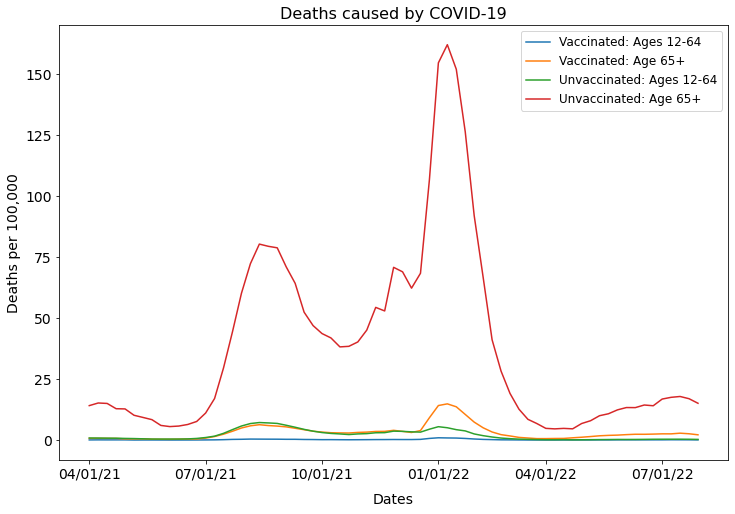

In [166]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
deaths_young2 = []
deaths_old2 = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_young2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_old2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_young, label = "Vaccinated: Ages 12-64")
plt.plot(weeks, deaths_old, label = "Vaccinated: Age 65+")
plt.plot(weeks, deaths_young2, label = "Unvaccinated: Ages 12-64")
plt.plot(weeks, deaths_old2, label = "Unvaccinated: Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213', '202226'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22', '07/01/22'], fontsize=14)
plt.yticks([0, 25, 50, 75, 100, 125, 150], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

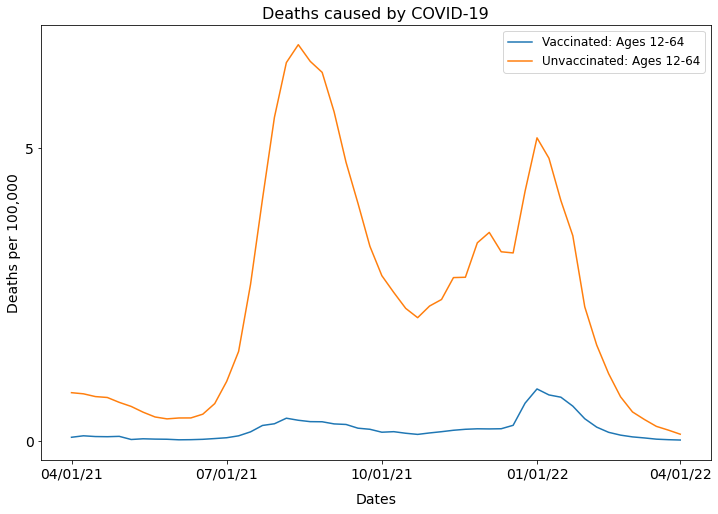

In [45]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
deaths_young2 = []
deaths_old2 = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_young2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_old2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_young, label = "Vaccinated: Ages 12-64")
#plt.plot(weeks, deaths_old, label = "Vaccinated: Age 65+")
plt.plot(weeks, deaths_young2, label = "Unvaccinated: Ages 12-64")
#plt.plot(weeks, deaths_old2, label = "Unvaccinated: Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([0, 5], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

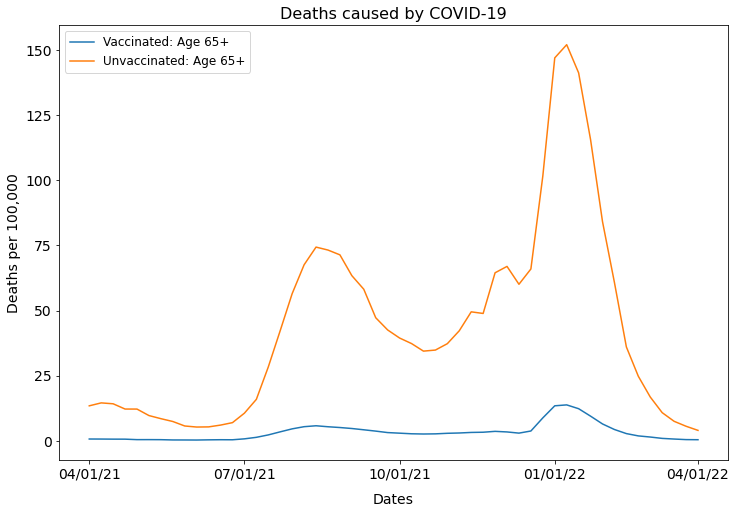

In [46]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
deaths_young2 = []
deaths_old2 = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_young2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_old2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
#plt.plot(weeks, deaths_young, label = "Vaccinated: Ages 12-64")
plt.plot(weeks, deaths_old, label = "Vaccinated: Age 65+")
#plt.plot(weeks, deaths_young2, label = "Unvaccinated: Ages 12-64")
plt.plot(weeks, deaths_old2, label = "Unvaccinated: Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([0, 25, 50, 75, 100, 125, 150], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

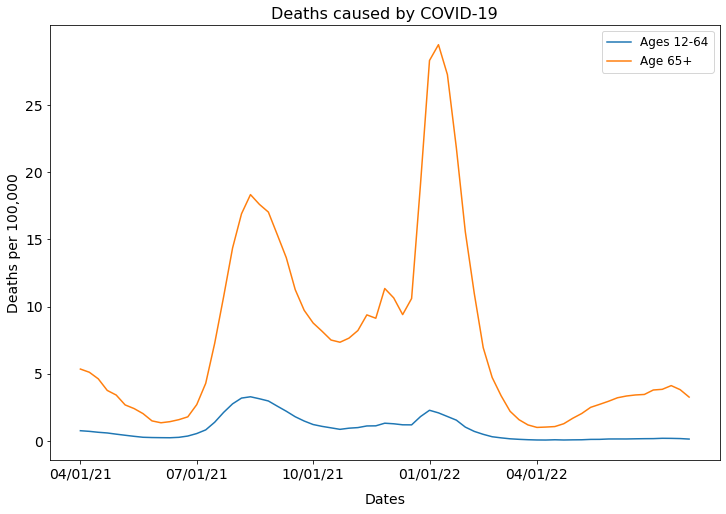

In [154]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))    

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_young, label = "Ages 12-64")
plt.plot(weeks, deaths_old, label = "Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [8]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['65+'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
250,death,OCT 2021,202140,65+,all_types,24,1507310,765,26156427,1725,...,2.924711,39.869860,25.040099,13.632066,NaN,NaN,NaN,NaN,NaN,1
257,death,OCT 2021,202141,65+,all_types,28,2633320,702,25148990,1573,...,2.791365,37.446616,35.217473,13.415165,NaN,NaN,NaN,NaN,NaN,1
264,death,OCT 2021,202142,65+,all_types,24,3788751,679,24102071,1387,...,2.817185,33.883720,53.490407,12.027508,NaN,NaN,NaN,NaN,NaN,1
271,death,OCT 2021,202143,65+,all_types,32,4781341,694,23201371,1337,...,2.991203,34.053749,50.882059,11.384635,NaN,NaN,NaN,NaN,NaN,1
278,death,NOV 2021,202144,65+,all_types,43,5748091,719,22319812,1354,...,3.221353,35.739076,47.774758,11.094429,NaN,NaN,NaN,NaN,NaN,1
285,death,NOV 2021,202145,65+,all_types,40,7680473,772,20509797,1477,...,3.764055,40.186970,77.163735,10.676510,NaN,NaN,NaN,NaN,NaN,1
292,death,NOV 2021,202146,65+,all_types,65,9556086,800,18749149,1712,...,4.266860,47.984166,70.544741,11.245779,NaN,NaN,NaN,NaN,NaN,1
299,death,NOV 2021,202147,65+,all_types,78,11043297,804,17353932,1632,...,4.632956,46.599377,65.975738,10.058239,NaN,NaN,NaN,NaN,NaN,1
306,death,DEC 2021,202148,65+,all_types,111,12438252,864,16046834,2117,...,5.384240,61.842020,69.297895,11.485748,NaN,NaN,NaN,NaN,NaN,1
313,death,DEC 2021,202149,65+,all_types,115,13488636,819,15063174,2203,...,5.437101,65.649634,77.002088,12.074382,NaN,NaN,NaN,NaN,NaN,1


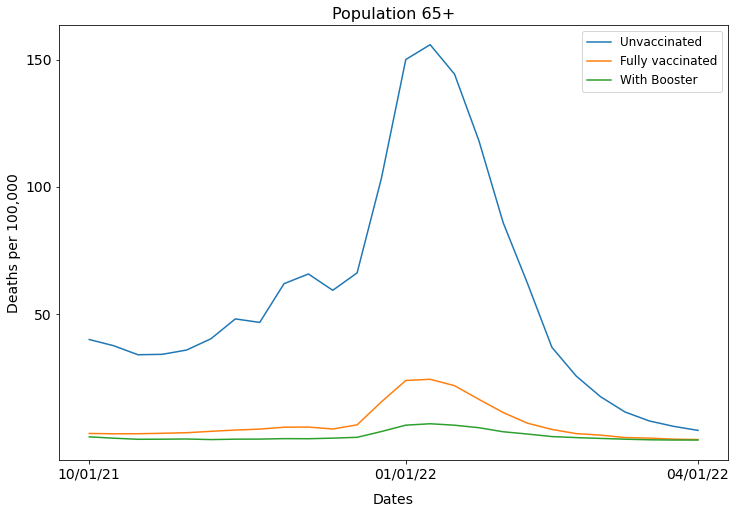

In [9]:
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_novax = []
deaths_boost = []
for week in weeks:
    deaths_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_with_outcome'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    deaths_vax.append(deaths_vaccinated*100000/ppl_vaccinated)
    deaths_novax.append(deaths_unvaccinated*100000/ppl_unvaccinated)
    deaths_boost.append(deaths_boosted*100000/ppl_boosted)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_novax, label = "Unvaccinated")
plt.plot(weeks, deaths_vax, label = "Fully vaccinated")
plt.plot(weeks, deaths_boost, label = "With Booster")
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([50, 100, 150], fontsize=14)
plt.legend(fontsize=12)
plt.title("Population 65+", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [10]:
"""
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_novax = []
deaths_boost = []
for week in weeks:
    deaths_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_with_outcome'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_with_outcome'])
    deaths_all = deaths_vaccinated + deaths_unvaccinated + deaths_boosted
    deaths_vax.append(deaths_vaccinated/deaths_all)
    deaths_novax.append(deaths_unvaccinated/deaths_all)
    deaths_boost.append(deaths_boosted/deaths_all)

deaths_all = {
    'With Booster': deaths_boost,
    'Fully vaccinated': deaths_vax,
    'Unvaccinated': deaths_novax, 
}

fig, ax = plt.subplots()
ax.stackplot(weeks, deaths_all.values(),
             labels=deaths_all.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title("Population 65+", fontsize=16)
ax.set_ylabel("Deaths per 100,000", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)

plt.show()
"""

'\nweeks = list(set(df[\'mmwr_week\']))\n\ndeaths_vax = []\ndeaths_novax = []\ndeaths_boost = []\nfor week in weeks:\n    deaths_vaccinated = sum(df.loc[(df[\'mmwr_week\'] == week)][\'primary_series_only_with_outcome\'])\n    deaths_unvaccinated = sum(df.loc[(df[\'mmwr_week\'] == week)][\'unvaccinated_with_outcome\'])\n    deaths_boosted = sum(df.loc[(df[\'mmwr_week\'] == week)][\'boosted_with_outcome\'])\n    deaths_all = deaths_vaccinated + deaths_unvaccinated + deaths_boosted\n    deaths_vax.append(deaths_vaccinated/deaths_all)\n    deaths_novax.append(deaths_unvaccinated/deaths_all)\n    deaths_boost.append(deaths_boosted/deaths_all)\n\ndeaths_all = {\n    \'With Booster\': deaths_boost,\n    \'Fully vaccinated\': deaths_vax,\n    \'Unvaccinated\': deaths_novax, \n}\n\nfig, ax = plt.subplots()\nax.stackplot(weeks, deaths_all.values(),\n             labels=deaths_all.keys(), alpha=0.8)\nax.legend(loc=\'upper left\')\nax.set_title("Population 65+", fontsize=16)\nax.set_ylabel("Deaths

[202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213]


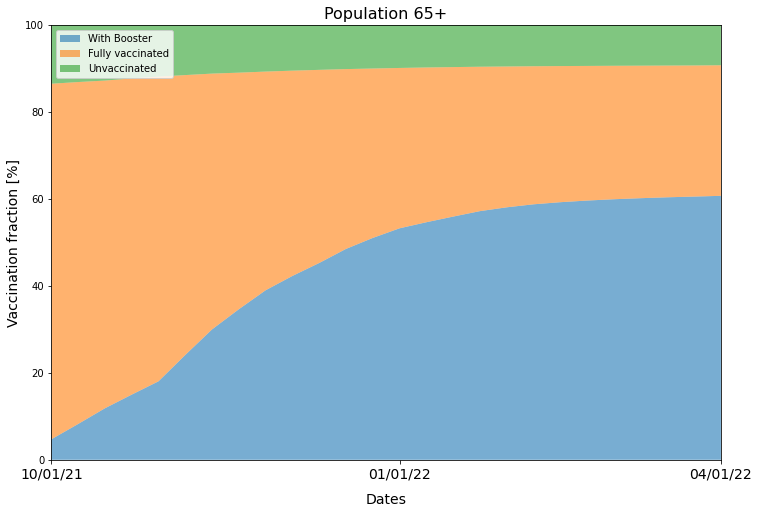

In [11]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted
    ppl_vax.append(ppl_vaccinated*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)

ppl_all = {
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.stackplot(weeks, ppl_all.values(),
             labels=ppl_all.keys(), alpha=0.6)
ax.legend(loc='upper left')
ax.set_title("Population 65+", fontsize=16)
ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.xlim(['202140', '202213'])
plt.ylim([0, 100])
plt.show()

In [56]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')
df = df.loc[(df['outcome'] == 'death') & (df['Vaccine product'] == 'all_types') & (df['Age group'] != 'all_ages_adj')]
df

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
760,death,APR 2021,202114,12-17,all_types,0,35662.00,2,16450239.00,0.000000,0.012158,NaN,NaN,NaN,NaN,0
761,death,APR 2021,202114,18-29,all_types,0,2375990.00,24,29083633.00,0.000000,0.082521,NaN,NaN,NaN,NaN,0
762,death,APR 2021,202114,30-49,all_types,2,6890181.00,214,38710374.00,0.029027,0.552823,19.045266,NaN,NaN,NaN,0
763,death,APR 2021,202114,50-64,all_types,9,6882873.00,668,21515030.00,0.130759,3.104806,23.744430,NaN,NaN,NaN,0
764,death,APR 2021,202114,65-79,all_types,55,13513056.00,774,7219634.00,0.407014,10.720765,26.340054,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,death,JUL 2022,202230,18-29,all_types,0,22532475.00,3,11726915.45,0.000000,0.025582,NaN,NaN,NaN,NaN,1
1476,death,JUL 2022,202230,30-49,all_types,16,41337585.00,24,12723777.30,0.038706,0.188623,4.873268,NaN,NaN,NaN,1
1477,death,JUL 2022,202230,50-64,all_types,71,33925556.00,76,6314462.60,0.209282,1.203586,5.751033,NaN,NaN,NaN,1
1478,death,JUL 2022,202230,65-79,all_types,254,25141354.55,188,1978245.90,1.010288,9.503369,9.406597,NaN,NaN,NaN,1


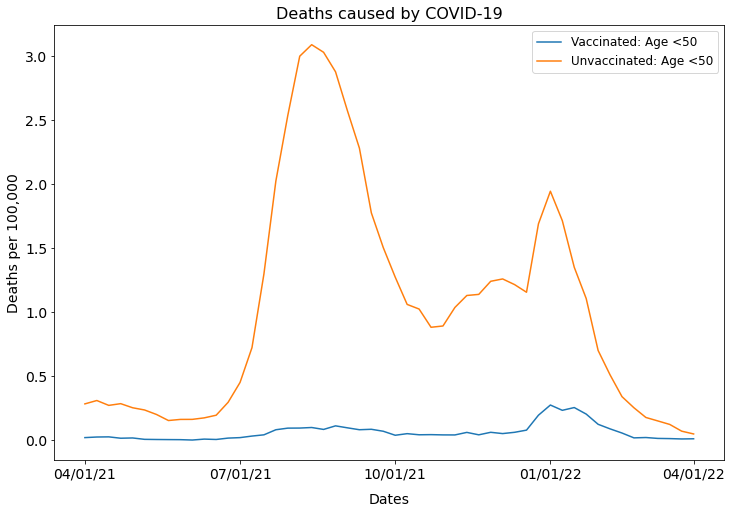

In [62]:
df1 = df.loc[df['Age group'].isin(['12-17', '18-29', '30-49'])]
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths1_u = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    if (ppl_unvaccinated > 0):
        deaths1_u.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    else:
        deaths1_u.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Vaccinated: Age <50")
plt.plot(weeks, deaths1_u, label = "Unvaccinated: Age <50")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

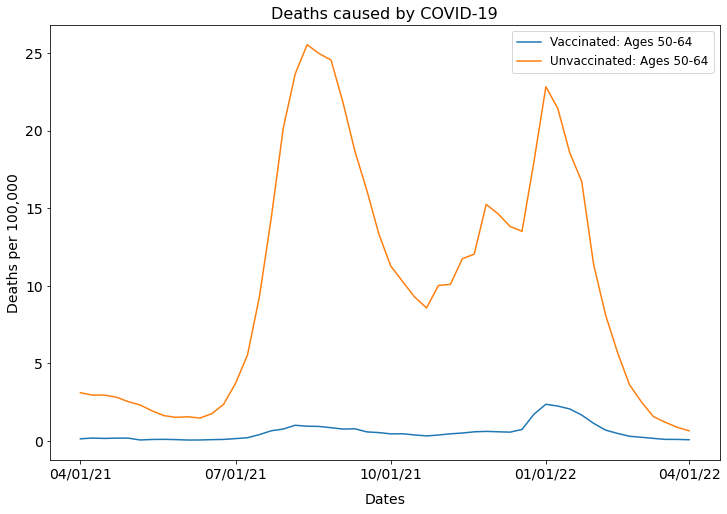

In [63]:
df1 = df.loc[df['Age group'].isin(['50-64'])]
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths1_u = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    if (ppl_unvaccinated > 0):
        deaths1_u.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    else:
        deaths1_u.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Vaccinated: Ages 50-64")
plt.plot(weeks, deaths1_u, label = "Unvaccinated: Ages 50-64")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

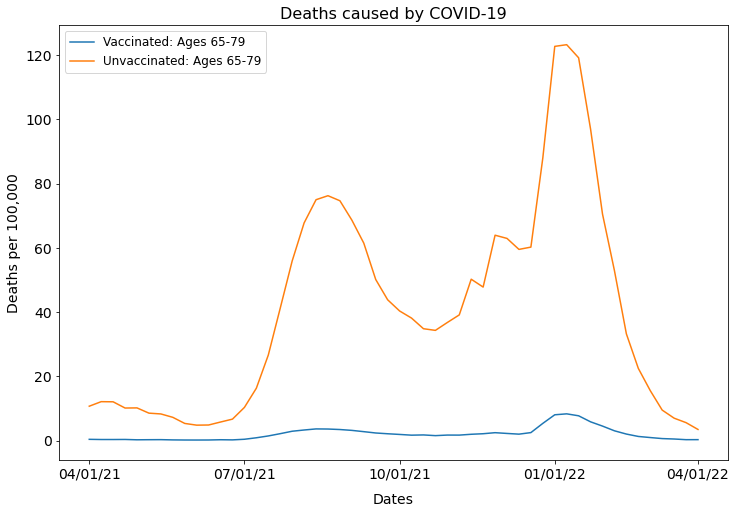

In [64]:
df1 = df.loc[df['Age group'].isin(['65-79'])]
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths1_u = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    if (ppl_unvaccinated > 0):
        deaths1_u.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    else:
        deaths1_u.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Vaccinated: Ages 65-79")
plt.plot(weeks, deaths1_u, label = "Unvaccinated: Ages 65-79")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

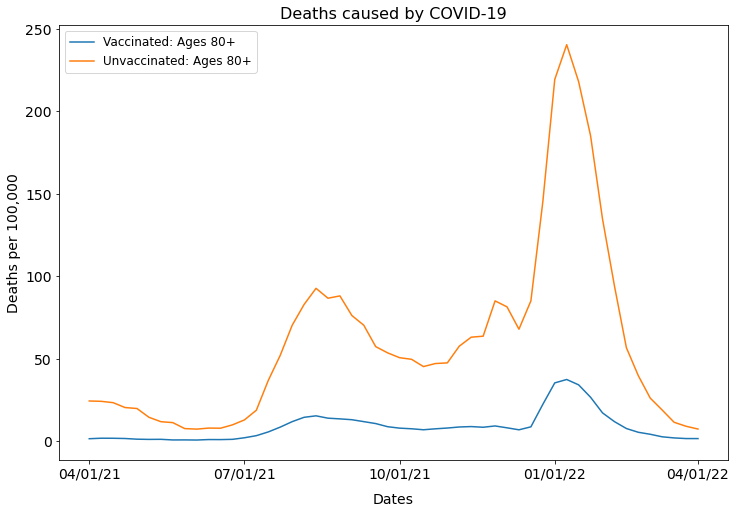

In [65]:
df1 = df.loc[df['Age group'].isin(['80+'])]
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths1_u = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    if (ppl_unvaccinated > 0):
        deaths1_u.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    else:
        deaths1_u.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Vaccinated: Ages 80+")
plt.plot(weeks, deaths1_u, label = "Unvaccinated: Ages 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [68]:
df1 = df.loc[df['Age group'].isin(['12-17', '18-29', '30-49'])]
df2 = df.loc[df['Age group'].isin(['50-64'])]
df3 = df.loc[df['Age group'].isin(['65-79'])]
df4 = df.loc[df['Age group'].isin(['80+'])]

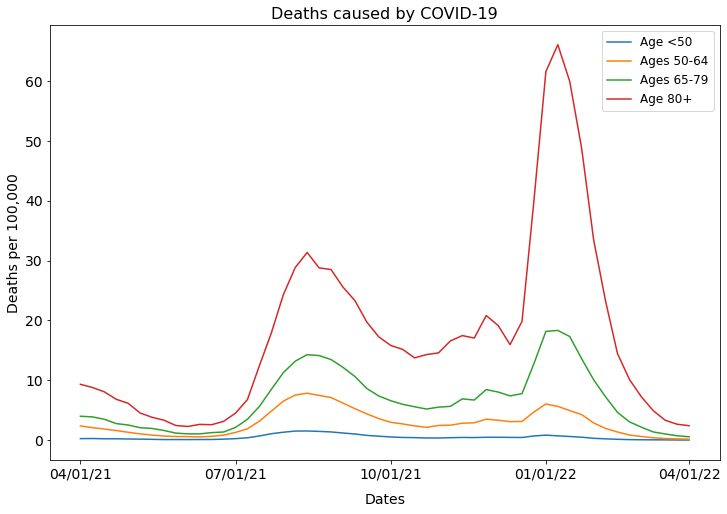

In [69]:
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths2 = []
deaths3 = []
deaths4 = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    deaths1.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated population'])
    deaths2.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated population'])
    deaths3.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated population'])
    deaths4.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Age <50")
plt.plot(weeks, deaths2, label = "Ages 50-64")
plt.plot(weeks, deaths3, label = "Ages 65-79")
plt.plot(weeks, deaths4, label = "Age 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

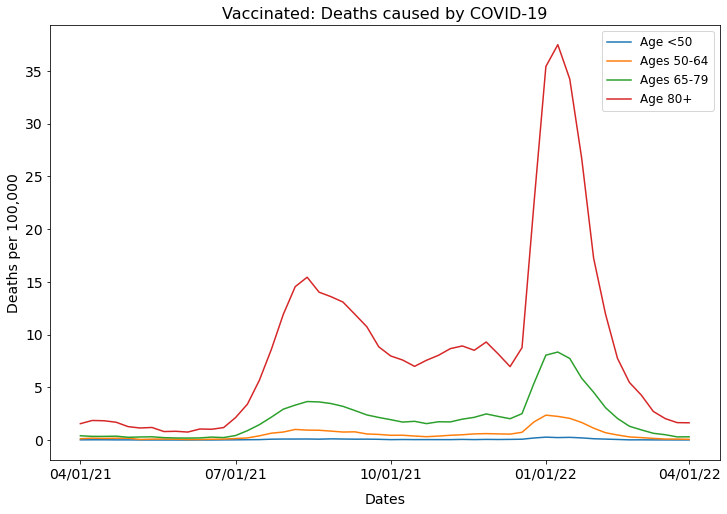

In [71]:
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths2 = []
deaths3 = []
deaths4 = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    deaths_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths2.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths2.append(0)
    deaths_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths3.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths3.append(0)
    deaths_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths4.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths4.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Age <50")
plt.plot(weeks, deaths2, label = "Ages 50-64")
plt.plot(weeks, deaths3, label = "Ages 65-79")
plt.plot(weeks, deaths4, label = "Age 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Vaccinated: Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

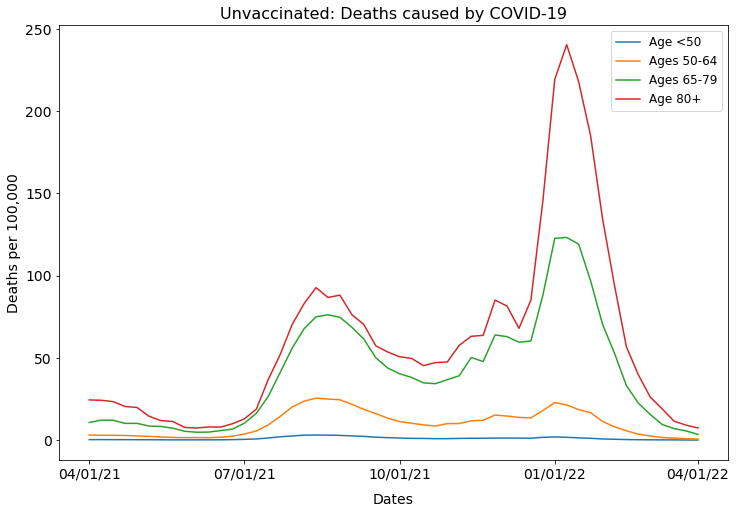

In [72]:
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths2 = []
deaths3 = []
deaths4 = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    deaths1.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated population'])
    deaths2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated population'])
    deaths3.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated population'])
    deaths4.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Age <50")
plt.plot(weeks, deaths2, label = "Ages 50-64")
plt.plot(weeks, deaths3, label = "Ages 65-79")
plt.plot(weeks, deaths4, label = "Age 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Unvaccinated: Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [18]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['65+'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
250,death,OCT 2021,202140,65+,all_types,24,1507310,765,26156427,1725,...,2.924711,39.869860,25.040099,13.632066,NaN,NaN,NaN,NaN,NaN,1
257,death,OCT 2021,202141,65+,all_types,28,2633320,702,25148990,1573,...,2.791365,37.446616,35.217473,13.415165,NaN,NaN,NaN,NaN,NaN,1
264,death,OCT 2021,202142,65+,all_types,24,3788751,679,24102071,1387,...,2.817185,33.883720,53.490407,12.027508,NaN,NaN,NaN,NaN,NaN,1
271,death,OCT 2021,202143,65+,all_types,32,4781341,694,23201371,1337,...,2.991203,34.053749,50.882059,11.384635,NaN,NaN,NaN,NaN,NaN,1
278,death,NOV 2021,202144,65+,all_types,43,5748091,719,22319812,1354,...,3.221353,35.739076,47.774758,11.094429,NaN,NaN,NaN,NaN,NaN,1
285,death,NOV 2021,202145,65+,all_types,40,7680473,772,20509797,1477,...,3.764055,40.186970,77.163735,10.676510,NaN,NaN,NaN,NaN,NaN,1
292,death,NOV 2021,202146,65+,all_types,65,9556086,800,18749149,1712,...,4.266860,47.984166,70.544741,11.245779,NaN,NaN,NaN,NaN,NaN,1
299,death,NOV 2021,202147,65+,all_types,78,11043297,804,17353932,1632,...,4.632956,46.599377,65.975738,10.058239,NaN,NaN,NaN,NaN,NaN,1
306,death,DEC 2021,202148,65+,all_types,111,12438252,864,16046834,2117,...,5.384240,61.842020,69.297895,11.485748,NaN,NaN,NaN,NaN,NaN,1
313,death,DEC 2021,202149,65+,all_types,115,13488636,819,15063174,2203,...,5.437101,65.649634,77.002088,12.074382,NaN,NaN,NaN,NaN,NaN,1


[202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213]


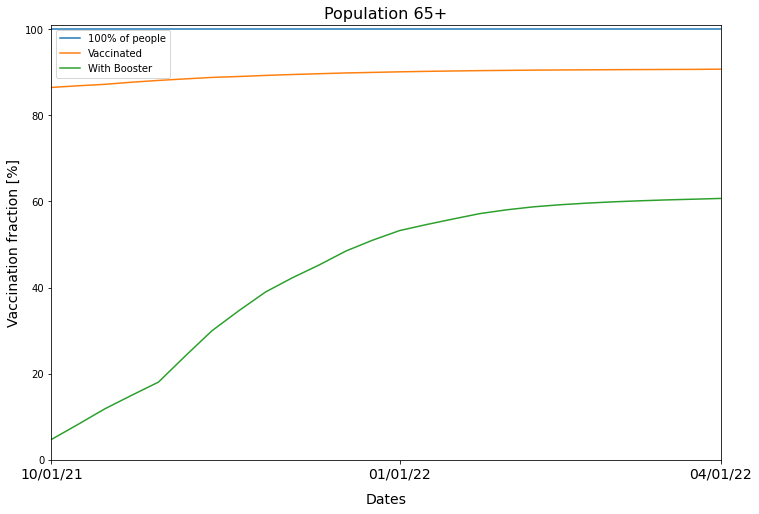

In [21]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted
    ppl_vax.append((ppl_vaccinated+ppl_boosted)*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)

ppl_all = {
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.plot(weeks, len(weeks)*[100], label='100% of people')
ax.plot(weeks, ppl_vax, label='Vaccinated')
ax.plot(weeks, ppl_boost, label='With Booster')
ax.legend(loc='upper left')
ax.set_title("Population 65+", fontsize=16)
ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.xlim(['202140', '202213'])
plt.ylim([0, 101])
plt.show()

In [22]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['18-49'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
248,death,OCT 2021,202140,18-49,all_types,1,466269,19,50152135,435,...,0.037885,1.378607,6.428018,36.389523,NaN,NaN,NaN,NaN,NaN,0
255,death,OCT 2021,202141,18-49,all_types,0,720461,20,50592139,368,...,0.039532,1.184187,NaN,29.955277,NaN,NaN,NaN,NaN,NaN,0
262,death,OCT 2021,202142,18-49,all_types,1,1070621,20,50859698,336,...,0.039324,1.096538,11.739765,27.884794,NaN,NaN,NaN,NaN,NaN,0
269,death,OCT 2021,202143,18-49,all_types,0,1438403,21,51024755,295,...,0.041156,0.977093,NaN,23.740923,NaN,NaN,NaN,NaN,NaN,0
276,death,NOV 2021,202144,18-49,all_types,2,1839911,19,51094531,301,...,0.037186,1.011929,9.309298,27.212657,NaN,NaN,NaN,NaN,NaN,0
283,death,NOV 2021,202145,18-49,all_types,2,2519006,21,50840518,307,...,0.041306,1.046841,13.184994,25.343780,NaN,NaN,NaN,NaN,NaN,0
290,death,NOV 2021,202146,18-49,all_types,2,3388897,31,50371951,349,...,0.061542,1.208731,20.481322,19.640687,NaN,NaN,NaN,NaN,NaN,0
297,death,NOV 2021,202147,18-49,all_types,4,4365522,23,49750671,344,...,0.046231,1.209891,13.204511,26.170815,NaN,NaN,NaN,NaN,NaN,0
304,death,DEC 2021,202148,18-49,all_types,1,5570656,30,48885768,382,...,0.061368,1.365429,76.063364,22.250019,NaN,NaN,NaN,NaN,NaN,0
311,death,DEC 2021,202149,18-49,all_types,3,6980186,21,47776809,386,...,0.043954,1.405990,32.713570,31.987481,NaN,NaN,NaN,NaN,NaN,0


[202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213]


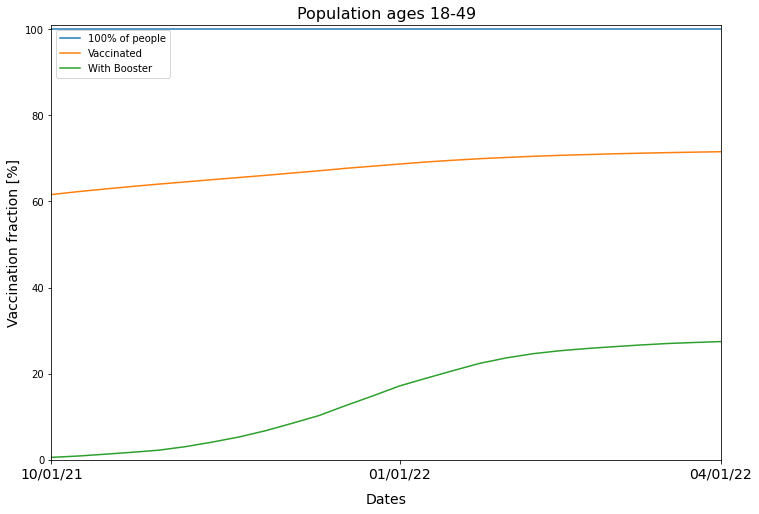

In [24]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted
    ppl_vax.append((ppl_vaccinated+ppl_boosted)*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)

ppl_all = {
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.plot(weeks, len(weeks)*[100], label='100% of people')
ax.plot(weeks, ppl_vax, label='Vaccinated')
ax.plot(weeks, ppl_boost, label='With Booster')
ax.legend(loc='upper left')
ax.set_title("Population ages 18-49", fontsize=16)
ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.xlim(['202140', '202213'])
plt.ylim([0, 101])
plt.show()

In [100]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['50-64'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
396,death,OCT 2021,202140,50-64,all_types,4,519538,125,29349192,1016,...,0.425906,11.075216,14.384989,26.003891,NaN,NaN,NaN,NaN,NaN,0
403,death,OCT 2021,202141,50-64,all_types,8,757735,120,29335527,906,...,0.409060,10.041330,9.510834,24.547309,NaN,NaN,NaN,NaN,NaN,0
410,death,OCT 2021,202142,50-64,all_types,7,1105111,103,29189395,802,...,0.352868,9.033333,14.261194,25.599760,NaN,NaN,NaN,NaN,NaN,0
417,death,OCT 2021,202143,50-64,all_types,5,1467278,87,28998373,728,...,0.300017,8.372086,24.568355,27.905387,NaN,NaN,NaN,NaN,NaN,0
424,death,NOV 2021,202144,50-64,all_types,5,1872338,105,28743633,834,...,0.365298,9.803294,36.710158,26.836407,NaN,NaN,NaN,NaN,NaN,0
431,death,NOV 2021,202145,50-64,all_types,5,2671046,127,28090948,819,...,0.452103,9.829745,52.511402,21.742272,NaN,NaN,NaN,NaN,NaN,0
438,death,NOV 2021,202146,50-64,all_types,14,3640937,140,27262536,934,...,0.513525,11.480737,29.857601,22.356715,NaN,NaN,NaN,NaN,NaN,0
445,death,NOV 2021,202147,50-64,all_types,18,4616854,157,26411674,932,...,0.594434,11.749273,30.135931,19.765475,NaN,NaN,NaN,NaN,NaN,0
452,death,DEC 2021,202148,50-64,all_types,12,5767305,168,25386411,1148,...,0.661771,14.844801,71.345411,22.431917,NaN,NaN,NaN,NaN,NaN,1
459,death,DEC 2021,202149,50-64,all_types,20,7009255,163,24257146,1143,...,0.671967,15.217676,53.332286,22.646466,NaN,NaN,NaN,NaN,NaN,1


[202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213]


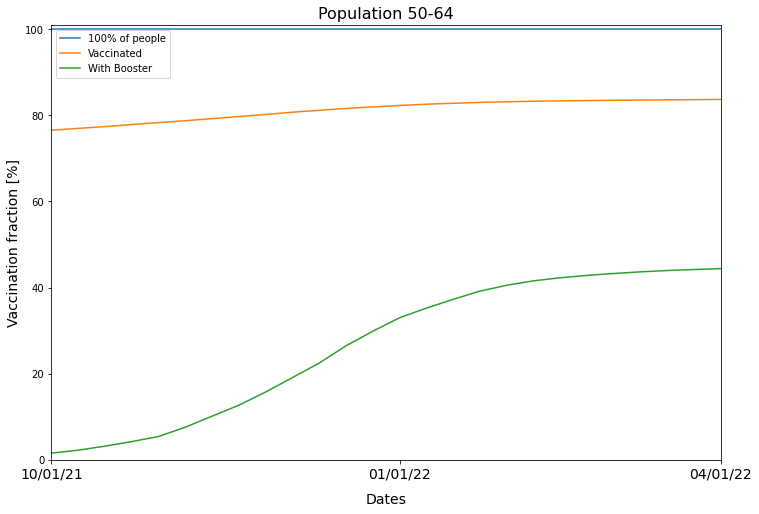

In [26]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted
    ppl_vax.append((ppl_vaccinated+ppl_boosted)*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)

ppl_all = {
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.plot(weeks, len(weeks)*[100], label='100% of people')
ax.plot(weeks, ppl_vax, label='Vaccinated')
ax.plot(weeks, ppl_boost, label='With Booster')
ax.legend(loc='upper left')
ax.set_title("Population 50-64", fontsize=16)
ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.xlim(['202140', '202213'])
plt.ylim([0, 101])
#plt.rcParams['savefig.facecolor']='white'
#plt.savefig("vax_50-64.png")
plt.show()

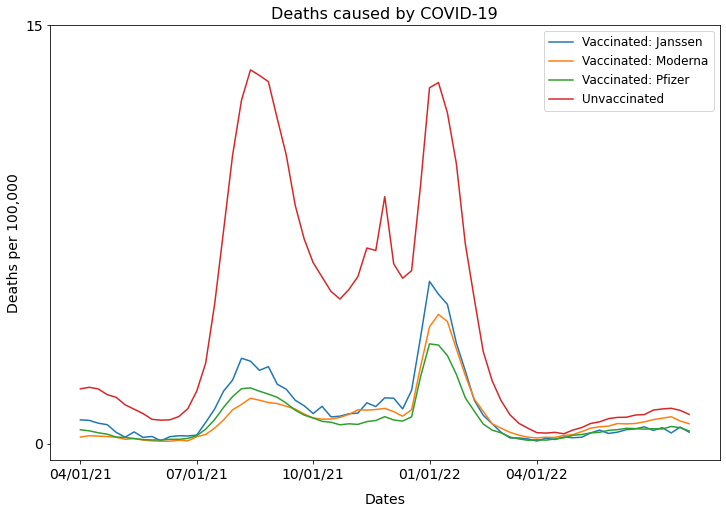

In [99]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')
#df = df.loc[(df['Vaccine product'] == 'all_types') & (df['MMWR week'] == 202213)]
df = df.loc[(df['outcome'] == 'death') & (df['Age group'] == 'all_ages_adj')]
df
# & (df['Age group'] != 'all_ages_adj')
#(df['outcome'] == 'death') & 

df1 = df.loc[df['Vaccine product'] == 'Janssen']
df2 = df.loc[df['Vaccine product'] == 'Moderna']
df3 = df.loc[df['Vaccine product'] == 'Pfizer']

weeks = list(set(df_young['MMWR week']))

deaths_jj = []
deaths_mod = []
deaths_pf = []
deaths_unvax = []
for week in weeks:
    
    deaths = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    deaths_jj.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    deaths_mod.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    deaths_pf.append((deaths)*100000/(ppl_vaccinated))
    
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    deaths_unvax.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

plt.yticks(fontsize=14)
plt.plot(weeks, deaths_jj, label = "Vaccinated: Janssen")
plt.plot(weeks, deaths_mod, label = "Vaccinated: Moderna")
plt.plot(weeks, deaths_pf, label = "Vaccinated: Pfizer")
plt.plot(weeks, deaths_unvax, label = "Unvaccinated")

plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([0, 15], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [105]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['month'] != 'SEP 2021')]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
395,death,OCT 2021,202140,18-49,all_types,1,432697,21,52423762,508,...,0.040058,1.538563,6.657316,38.408220,NaN,NaN,NaN,NaN,NaN,0
396,death,OCT 2021,202140,50-64,all_types,4,519538,125,29349192,1016,...,0.425906,11.075216,14.384989,26.003891,NaN,NaN,NaN,NaN,NaN,0
397,death,OCT 2021,202140,65+,all_types,24,1292152,897,27782840,1973,...,3.228612,44.060480,23.722015,13.646881,NaN,NaN,NaN,NaN,NaN,1
398,death,OCT 2021,202140,all_ages,Janssen,0,38048,86,9368609,3497,...,0.917959,7.493134,NaN,8.162818,0.000000,0.975187,10.705445,NaN,10.977835,0
399,death,OCT 2021,202140,all_ages,Moderna,10,917212,386,43269394,3497,...,0.892086,7.493134,6.872792,8.399569,0.838811,0.527155,10.705445,12.762650,20.307960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,death,JUL 2022,202230,65+,all_types,468,22570288,229,9717819,448,...,2.356496,15.559316,7.503808,6.602734,NaN,NaN,NaN,NaN,NaN,1
731,death,JUL 2022,202230,all_ages,Janssen,21,4158662,22,6800245,552,...,0.323518,1.049062,2.077474,3.242673,0.344505,0.364754,2.363838,6.861542,6.480630,1
732,death,JUL 2022,202230,all_ages,Moderna,235,27860069,122,22376131,552,...,0.545224,1.049062,1.243700,1.924095,0.330372,0.368389,2.363838,7.155074,6.416682,1
733,death,JUL 2022,202230,all_ages,Pfizer,258,38687362,124,45074388,552,...,0.275101,1.049062,1.573079,3.813374,0.337946,0.357948,2.363838,6.994719,6.603851,1


Index(['outcome', 'month', 'mmwr_week', 'age_group', 'vaccine_product',
       'one_boosted_with_outcome', 'one_booster_population',
       'two_boosted_with_outcome', 'two_booster_population',
       'vaccinated_with_outcome', 'fully_vaccinated_population',
       'unvaccinated_with_outcome', 'unvaccinated_population',
       'crude_one_booster_ir', 'crude_two_booster_ir', 'crude_vax_ir',
       'crude_unvax_ir', 'crude_irr', 'crude_one_booster_irr',
       'crude_two_booster_irr', 'crude_one_two_booster_irr',
       'age_adj_one_booster_ir', 'age_adj_two_booster_ir', 'age_adj_vax_ir',
       'age_adj_unvax_ir', 'age_adj_one_booster_irr',
       'age_adj_two_booster_irr', 'age_adj_vax_irr',
       'age_adj_one_two_booster_irr', 'continuity_correction'],
      dtype='object')

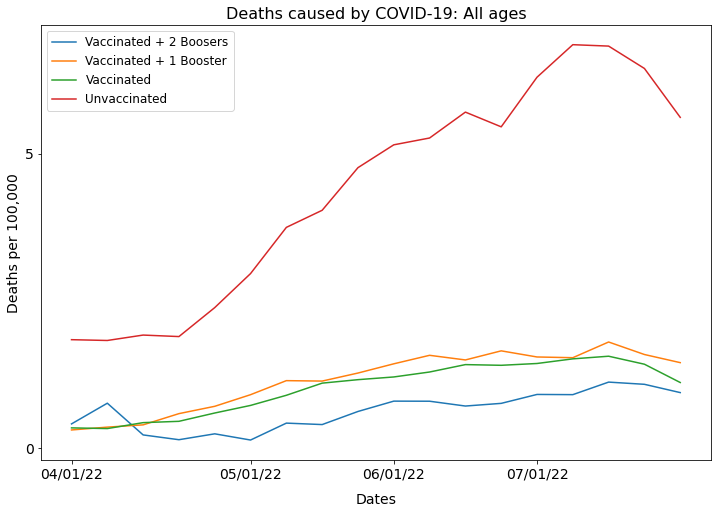

In [151]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Second_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['month'] != 'SEP 2021') & (df['vaccine_product'] == 'all_types') & (df['age_group'] == 'all_ages')]
df.columns
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_boost = []
deaths_boost2 = []
deaths_unvax = []
for week in weeks:
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['two_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['two_booster_population'])
    deaths_boost2.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['one_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['one_booster_population'])
    deaths_boost.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['vaccinated_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['fully_vaccinated_population'])
    deaths_vax.append((deaths)*100000/(ppl_vaccinated))
    
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_unvax.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

plt.yticks(fontsize=14)
plt.plot(weeks, deaths_boost2, label = "Vaccinated + 2 Boosers")
plt.plot(weeks, deaths_boost, label = "Vaccinated + 1 Booster")
plt.plot(weeks, deaths_vax, label = "Vaccinated")
plt.plot(weeks, deaths_unvax, label = "Unvaccinated")

plt.xticks(['202213', '202218', '202222', '202226'], ['04/01/22', '05/01/22', '06/01/22', '07/01/22'], fontsize=14)
plt.yticks([0, 5], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19: All ages", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

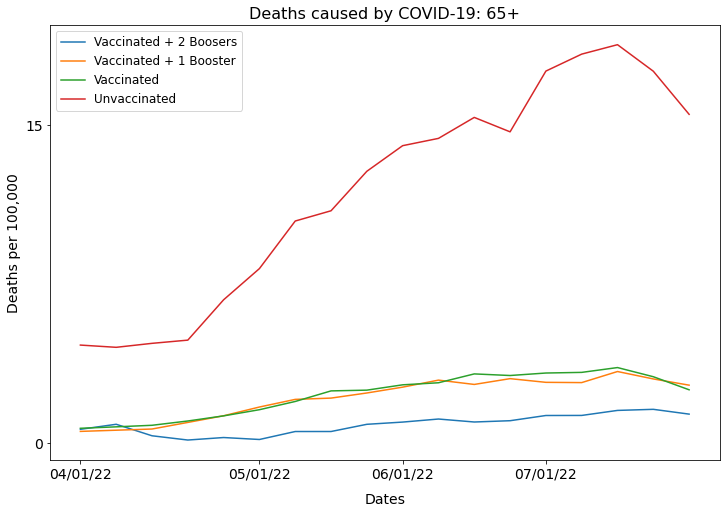

In [152]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Second_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['month'] != 'SEP 2021') & (df['vaccine_product'] == 'all_types') & (df['age_group'] == '65+')]
df.columns
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_boost = []
deaths_boost2 = []
deaths_unvax = []
for week in weeks:
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['two_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['two_booster_population'])
    deaths_boost2.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['one_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['one_booster_population'])
    deaths_boost.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['vaccinated_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['fully_vaccinated_population'])
    deaths_vax.append((deaths)*100000/(ppl_vaccinated))
    
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_unvax.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

plt.yticks(fontsize=14)
plt.plot(weeks, deaths_boost2, label = "Vaccinated + 2 Boosers")
plt.plot(weeks, deaths_boost, label = "Vaccinated + 1 Booster")
plt.plot(weeks, deaths_vax, label = "Vaccinated")
plt.plot(weeks, deaths_unvax, label = "Unvaccinated")

plt.xticks(['202213', '202218', '202222', '202226'], ['04/01/22', '05/01/22', '06/01/22', '07/01/22'], fontsize=14)
plt.yticks([0, 15], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19: 65+", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

[202213, 202214, 202215, 202216, 202217, 202218, 202219, 202220, 202221, 202222, 202223, 202224, 202225, 202226, 202227, 202228, 202229, 202230]


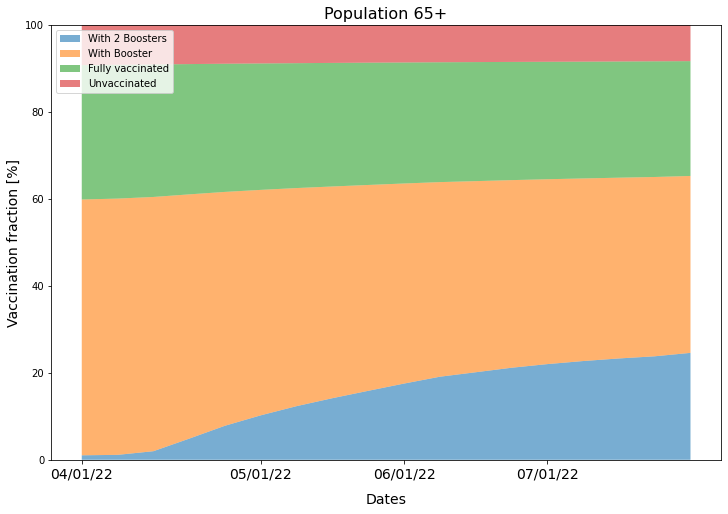

In [153]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
ppl_boost2 = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['fully_vaccinated_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['one_booster_population'])
    ppl_boosted2 = sum(df.loc[(df['mmwr_week'] == week)]['two_booster_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted + ppl_boosted2
    ppl_vax.append(ppl_vaccinated*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)
    ppl_boost2.append(ppl_boosted2*100/ppl_all)

ppl_all = {
    'With 2 Boosters': ppl_boost2,
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.stackplot(weeks, ppl_all.values(),
             labels=ppl_all.keys(), alpha=0.6)
ax.legend(loc='upper left')
ax.set_title("Population 65+", fontsize=16)ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202213', '202218', '202222', '202226'], ['04/01/22', '05/01/22', '06/01/22', '07/01/22'], fontsize=14)
#plt.xlim(['202140', '202213'])
plt.ylim([0, 100])
plt.show()